In [1]:
from __future__ import print_function
from collections import OrderedDict
import torch
import torch.nn as nn
import torchvision.models as models
import pprint

F = nn.functional
DEBUG = False


vgg16_dims = [
                    (64, 64, 'M'),                                # Stage - 1
                    (128, 128, 'M'),                              # Stage - 2
                    (256, 256, 256,'M'),                          # Stage - 3
                    (512, 512, 512, 'M'),                         # Stage - 4
                    (512, 512, 512, 'M')                          # Stage - 5
            ]

decoder_dims = [
                    ('U', 512, 512, 512),                         # Stage - 5
                    ('U', 512, 512, 512),                         # Stage - 4
                    ('U', 256, 256, 256),                         # Stage - 3
                    ('U', 128, 128),                              # Stage - 2
                    ('U', 64, 64)                                 # Stage - 1
                ]


class SegNet(nn.Module):
    def __init__(self, input_channels, output_channels):
        super(SegNet, self).__init__()

        self.input_channels = input_channels
        self.output_channels = output_channels

        self.num_channels = input_channels

        #self.vgg16 = models.vgg16(pretrained=True)


        # Encoder layers

        self.encoder_conv_00 = nn.Sequential(*[
                                                nn.Conv2d(in_channels=self.input_channels,
                                                          out_channels=64,
                                                          kernel_size=3,
                                                          padding=1),
                                                nn.BatchNorm2d(64)
                                                ])
        self.encoder_conv_01 = nn.Sequential(*[
                                                nn.Conv2d(in_channels=64,
                                                          out_channels=64,
                                                          kernel_size=3,
                                                          padding=1),
                                                nn.BatchNorm2d(64)
                                                ])
        self.encoder_conv_10 = nn.Sequential(*[
                                                nn.Conv2d(in_channels=64,
                                                          out_channels=128,
                                                          kernel_size=3,
                                                          padding=1),
                                                nn.BatchNorm2d(128)
                                                ])
        self.encoder_conv_11 = nn.Sequential(*[
                                                nn.Conv2d(in_channels=128,
                                                          out_channels=128,
                                                          kernel_size=3,
                                                          padding=1),
                                                nn.BatchNorm2d(128)
                                                ])
        self.encoder_conv_20 = nn.Sequential(*[
                                                nn.Conv2d(in_channels=128,
                                                          out_channels=256,
                                                          kernel_size=3,
                                                          padding=1),
                                                nn.BatchNorm2d(256)
                                                ])
        self.encoder_conv_21 = nn.Sequential(*[
                                                nn.Conv2d(in_channels=256,
                                                          out_channels=256,
                                                          kernel_size=3,
                                                          padding=1),
                                                nn.BatchNorm2d(256)
                                                ])
        self.encoder_conv_22 = nn.Sequential(*[
                                                nn.Conv2d(in_channels=256,
                                                          out_channels=256,
                                                          kernel_size=3,
                                                          padding=1),
                                                nn.BatchNorm2d(256)
                                                ])
        self.encoder_conv_30 = nn.Sequential(*[
                                                nn.Conv2d(in_channels=256,
                                                          out_channels=512,
                                                          kernel_size=3,
                                                          padding=1),
                                                nn.BatchNorm2d(512)
                                                ])
        self.encoder_conv_31 = nn.Sequential(*[
                                                nn.Conv2d(in_channels=512,
                                                          out_channels=512,
                                                          kernel_size=3,
                                                          padding=1),
                                                nn.BatchNorm2d(512)
                                                ])
        self.encoder_conv_32 = nn.Sequential(*[
                                                nn.Conv2d(in_channels=512,
                                                          out_channels=512,
                                                          kernel_size=3,
                                                          padding=1),
                                                nn.BatchNorm2d(512)
                                                ])
        self.encoder_conv_40 = nn.Sequential(*[
                                                nn.Conv2d(in_channels=512,
                                                          out_channels=512,
                                                          kernel_size=3,
                                                          padding=1),
                                                nn.BatchNorm2d(512)
                                                ])
        self.encoder_conv_41 = nn.Sequential(*[
                                                nn.Conv2d(in_channels=512,
                                                          out_channels=512,
                                                          kernel_size=3,
                                                          padding=1),
                                                nn.BatchNorm2d(512)
                                                ])
        self.encoder_conv_42 = nn.Sequential(*[
                                                nn.Conv2d(in_channels=512,
                                                          out_channels=512,
                                                          kernel_size=3,
                                                          padding=1),
                                                nn.BatchNorm2d(512)
                                                ])

        #self.init_vgg_weigts()

        # Decoder layers

        self.decoder_convtr_42 = nn.Sequential(*[
                                                nn.ConvTranspose2d(in_channels=512,
                                                                   out_channels=512,
                                                                   kernel_size=3,
                                                                   padding=1),
                                                nn.BatchNorm2d(512)
                                               ])
        self.decoder_convtr_41 = nn.Sequential(*[
                                                nn.ConvTranspose2d(in_channels=512,
                                                                   out_channels=512,
                                                                   kernel_size=3,
                                                                   padding=1),
                                                nn.BatchNorm2d(512)
                                               ])
        self.decoder_convtr_40 = nn.Sequential(*[
                                                nn.ConvTranspose2d(in_channels=512,
                                                                   out_channels=512,
                                                                   kernel_size=3,
                                                                   padding=1),
                                                nn.BatchNorm2d(512)
                                               ])
        self.decoder_convtr_32 = nn.Sequential(*[
                                                nn.ConvTranspose2d(in_channels=512,
                                                                   out_channels=512,
                                                                   kernel_size=3,
                                                                   padding=1),
                                                nn.BatchNorm2d(512)
                                               ])
        self.decoder_convtr_31 = nn.Sequential(*[
                                                nn.ConvTranspose2d(in_channels=512,
                                                                   out_channels=512,
                                                                   kernel_size=3,
                                                                   padding=1),
                                                nn.BatchNorm2d(512)
                                               ])
        self.decoder_convtr_30 = nn.Sequential(*[
                                                nn.ConvTranspose2d(in_channels=512,
                                                                   out_channels=256,
                                                                   kernel_size=3,
                                                                   padding=1),
                                                nn.BatchNorm2d(256)
                                               ])
        self.decoder_convtr_22 = nn.Sequential(*[
                                                nn.ConvTranspose2d(in_channels=256,
                                                                   out_channels=256,
                                                                   kernel_size=3,
                                                                   padding=1),
                                                nn.BatchNorm2d(256)
                                               ])
        self.decoder_convtr_21 = nn.Sequential(*[
                                                nn.ConvTranspose2d(in_channels=256,
                                                                   out_channels=256,
                                                                   kernel_size=3,
                                                                   padding=1),
                                                nn.BatchNorm2d(256)
                                               ])
        self.decoder_convtr_20 = nn.Sequential(*[
                                                nn.ConvTranspose2d(in_channels=256,
                                                                   out_channels=128,
                                                                   kernel_size=3,
                                                                   padding=1),
                                                nn.BatchNorm2d(128)
                                               ])
        self.decoder_convtr_11 = nn.Sequential(*[
                                                nn.ConvTranspose2d(in_channels=128,
                                                                   out_channels=128,
                                                                   kernel_size=3,
                                                                   padding=1),
                                                nn.BatchNorm2d(128)
                                               ])
        self.decoder_convtr_10 = nn.Sequential(*[
                                                nn.ConvTranspose2d(in_channels=128,
                                                                   out_channels=64,
                                                                   kernel_size=3,
                                                                   padding=1),
                                                nn.BatchNorm2d(64)
                                               ])
        self.decoder_convtr_01 = nn.Sequential(*[
                                                nn.ConvTranspose2d(in_channels=64,
                                                                   out_channels=64,
                                                                   kernel_size=3,
                                                                   padding=1),
                                                nn.BatchNorm2d(64)
                                               ])
        self.decoder_convtr_00 = nn.Sequential(*[
                                                nn.ConvTranspose2d(in_channels=64,
                                                                   out_channels=self.output_channels,
                                                                   kernel_size=3,
                                                                   padding=1)
                                               ])


    def forward(self, input_img):
        """
        Forward pass `input_img` through the network
        """

        # Encoder

        # Encoder Stage - 1
        dim_0 = input_img.size()
        x_00 = F.relu(self.encoder_conv_00(input_img))
        x_01 = F.relu(self.encoder_conv_01(x_00))
        x_0, indices_0 = F.max_pool2d(x_01, kernel_size=2, stride=2, return_indices=True)

        # Encoder Stage - 2
        dim_1 = x_0.size()
        x_10 = F.relu(self.encoder_conv_10(x_0))
        x_11 = F.relu(self.encoder_conv_11(x_10))
        x_1, indices_1 = F.max_pool2d(x_11, kernel_size=2, stride=2, return_indices=True)

        # Encoder Stage - 3
        dim_2 = x_1.size()
        x_20 = F.relu(self.encoder_conv_20(x_1))
        x_21 = F.relu(self.encoder_conv_21(x_20))
        x_22 = F.relu(self.encoder_conv_22(x_21))
        x_2, indices_2 = F.max_pool2d(x_22, kernel_size=2, stride=2, return_indices=True)

        # Encoder Stage - 4
        dim_3 = x_2.size()
        x_30 = F.relu(self.encoder_conv_30(x_2))
        x_31 = F.relu(self.encoder_conv_31(x_30))
        x_32 = F.relu(self.encoder_conv_32(x_31))
        x_3, indices_3 = F.max_pool2d(x_32, kernel_size=2, stride=2, return_indices=True)

        # Encoder Stage - 5
        dim_4 = x_3.size()
        x_40 = F.relu(self.encoder_conv_40(x_3))
        x_41 = F.relu(self.encoder_conv_41(x_40))
        x_42 = F.relu(self.encoder_conv_42(x_41))
        x_4, indices_4 = F.max_pool2d(x_42, kernel_size=2, stride=2, return_indices=True)

        # Decoder

        dim_d = x_4.size()

        # Decoder Stage - 5
        x_4d = F.max_unpool2d(x_4, indices_4, kernel_size=2, stride=2, output_size=dim_4)
        x_42d = F.relu(self.decoder_convtr_42(x_4d))
        x_41d = F.relu(self.decoder_convtr_41(x_42d))
        x_40d = F.relu(self.decoder_convtr_40(x_41d))
        dim_4d = x_40d.size()

        # Decoder Stage - 4
        x_3d = F.max_unpool2d(x_40d, indices_3, kernel_size=2, stride=2, output_size=dim_3)
        x_32d = F.relu(self.decoder_convtr_32(x_3d))
        x_31d = F.relu(self.decoder_convtr_31(x_32d))
        x_30d = F.relu(self.decoder_convtr_30(x_31d))
        dim_3d = x_30d.size()

        # Decoder Stage - 3
        x_2d = F.max_unpool2d(x_30d, indices_2, kernel_size=2, stride=2, output_size=dim_2)
        x_22d = F.relu(self.decoder_convtr_22(x_2d))
        x_21d = F.relu(self.decoder_convtr_21(x_22d))
        x_20d = F.relu(self.decoder_convtr_20(x_21d))
        dim_2d = x_20d.size()

        # Decoder Stage - 2
        x_1d = F.max_unpool2d(x_20d, indices_1, kernel_size=2, stride=2, output_size=dim_1)
        x_11d = F.relu(self.decoder_convtr_11(x_1d))
        x_10d = F.relu(self.decoder_convtr_10(x_11d))
        dim_1d = x_10d.size()

        # Decoder Stage - 1
        x_0d = F.max_unpool2d(x_10d, indices_0, kernel_size=2, stride=2, output_size=dim_0)
        x_01d = F.relu(self.decoder_convtr_01(x_0d))
        x_00d = self.decoder_convtr_00(x_01d)
        dim_0d = x_00d.size()

        x_softmax = F.softmax(x_00d, dim=1)


        if DEBUG:
            print("dim_0: {}".format(dim_0))
            print("dim_1: {}".format(dim_1))
            print("dim_2: {}".format(dim_2))
            print("dim_3: {}".format(dim_3))
            print("dim_4: {}".format(dim_4))

            print("dim_d: {}".format(dim_d))
            print("dim_4d: {}".format(dim_4d))
            print("dim_3d: {}".format(dim_3d))
            print("dim_2d: {}".format(dim_2d))
            print("dim_1d: {}".format(dim_1d))
            print("dim_0d: {}".format(dim_0d))


        return x_00d, x_softmax

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import torch
from torch.utils.data import Dataset
from PIL import Image

CLASSES = {'background', 'person'}

PALETTE = {
    (0,   0,   0)   : 0 ,   # background
    (255, 255, 255) : 1 ,   # person
}

class UTPDataset(Dataset):
    """Unite The People 20017 Dataset"""
    def __init__(self, img_dir, transform=None):
        self.transform = transform
        self.image_root_dir = img_dir
        
        self.img_extension = '_full.png'
        self.mask_extension = '_segmentation_full.png'

    def __getitem__(self, index):
        if not isinstance(index, int):
            index = index.item()
        image_id = str(index).zfill(5)
        image_path = os.path.join(self.image_root_dir, image_id + self.img_extension)
        mask_path = os.path.join(self.image_root_dir, image_id + self.mask_extension)

        image = self.load_image(path=image_path)
        mask = self.load_mask(path=mask_path)
        
        data = {
                    'image': torch.FloatTensor(image),
                    'mask' : torch.LongTensor(mask)
               }
        
        return data
    
    def load_image(self, path=None):
        raw_image = Image.open(path)
        raw_image = np.transpose(raw_image.resize((224, 224)), (2,1,0))
        imx_t = np.array(raw_image, dtype=np.float32)/255.0

        return imx_t

    def load_mask(self, path=None):
        raw_image = Image.open(path)
        raw_image = raw_image.resize((224, 224))
        imx_t = np.array(raw_image)
        label_seg = np.zeros((2,224,224), dtype=np.int)
        
        for k in PALETTE:
          label_seg[PALETTE[k]][(imx_t==k).all(axis=2)] = 1
          
        return label_seg
      
    def __len__(self):
        return 10000
    
#if __name__ == "__main__":
#    dataset_test = UTPDataset('dataset/dataset')
#    data = dataset_test.__getitem__(4)
#    print(data)

In [3]:
import torch.optim as optim
import time
import sys

NUM_INPUT_CHANNELS = 3
NUM_OUTPUT_CHANNELS = 2

NUM_EPOCHS = 100
LEARNING_RATE = 0.0001
MOMENTUM = 0.8
BATCH_SIZE = 16

def train():
  
  print("Training:")
  prev_loss = float('inf')

  for epoch in range(NUM_EPOCHS):
    print("Epoch #{}".format(epoch+1))
    
    for phase in ['train', 'val']:
      if phase == 'train':
        model.train()
      else:
        model.eval()
      
      t_start = time.time()
      running_loss = 0.0

      for idx, batch in enumerate(data_loaders[phase]):
        input_tensor, target_tensor = batch['image'], batch['mask']
        
        if phase == 'val':
            with torch.no_grad():
                input_tensor = input_tensor.cuda()
                target_tensor = target_tensor.cuda()

                predicted_tensor, softmaxed_tensor = model(input_tensor)
                target_tensor = torch.argmax(target_tensor, dim=1)

                optimizer.zero_grad()
                loss = criterion(softmaxed_tensor, target_tensor)

        else:
          input_tensor = input_tensor.cuda()
          target_tensor = target_tensor.cuda()

          predicted_tensor, softmaxed_tensor = model(input_tensor)       
          target_tensor = torch.argmax(target_tensor, dim=1)
          
          optimizer.zero_grad()
          loss = criterion(softmaxed_tensor, target_tensor)  
          loss.backward()
          optimizer.step()

        running_loss += loss.float()

        if idx % 10 == 0:
          print("\r\tBatch progress: {:.2f}% [{}/{}]".format((idx/len(data_loaders[phase]))*100, idx, len(data_loaders[phase])), end='')
          sys.stdout.flush()
    
      delta = time.time() - t_start
      print("\t{} Loss: {:.8f}\tTime: {:.8f}".format(phase, running_loss, delta))
      
    if running_loss < prev_loss:
        torch.save(model.state_dict(), os.path.join('.', 'epoch-{}.pth'.format(epoch+1)))
        prev_loss = running_loss

In [4]:
from torch.utils.data import DataLoader

full_dataset = UTPDataset(img_dir='dataset/dataset')

train_size = int(0.8 * len(full_dataset))
val_size = len(full_dataset) - train_size

train_dataset, val_dataset = torch.utils.data.random_split(full_dataset, [train_size, val_size])

train_dataloader = DataLoader(train_dataset,
                                  batch_size=BATCH_SIZE,
                                  shuffle=True,
                                  num_workers=6)

val_dataloader = DataLoader(val_dataset,
                                  batch_size=BATCH_SIZE,
                                  shuffle=True,
                                  num_workers=6)

data_loaders = {"train": train_dataloader, "val": val_dataloader}

if torch.cuda.is_available():
  model = SegNet(input_channels=3, output_channels=2).cuda()
  criterion = torch.nn.CrossEntropyLoss().cuda()
else:
  print('Error: Cuda was not available')
  
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)

train()

/home/user/miniconda/envs/py36/lib/python3.6/site-packages/torch/cuda/__init__.py:117: UserWarning: 
    Found GPU2 Quadro 2000 which is of cuda capability 2.1.
    PyTorch no longer supports this GPU because it is too old.
    
  warnings.warn(old_gpu_warn % (d, name, major, capability[1]))


Training:
Epoch #1
	Batch progress: 98.00% [490/500]	train Loss: 220.32803345	Time: 137.40705204
	Batch progress: 96.00% [120/125]	val Loss: 48.86895752	Time: 19.22655177
Epoch #2
	Batch progress: 98.00% [490/500]	train Loss: 195.62808228	Time: 138.00357461
	Batch progress: 96.00% [120/125]	val Loss: 48.67100525	Time: 19.09511399
Epoch #3
	Batch progress: 98.00% [490/500]	train Loss: 194.73722839	Time: 138.16135931
	Batch progress: 96.00% [120/125]	val Loss: 48.51136017	Time: 19.02404785
Epoch #4
	Batch progress: 98.00% [490/500]	train Loss: 194.07875061	Time: 138.13361287
	Batch progress: 96.00% [120/125]	val Loss: 48.25744629	Time: 19.20047832
Epoch #5
	Batch progress: 98.00% [490/500]	train Loss: 192.60110474	Time: 138.16715384
	Batch progress: 96.00% [120/125]	val Loss: 48.18843460	Time: 19.07476163
Epoch #6
	Batch progress: 98.00% [490/500]	train Loss: 190.49758911	Time: 137.98402119
	Batch progress: 96.00% [120/125]	val Loss: 47.44272614	Time: 19.27278733
Epoch #7
	Batch progress

# Predict from the val split

torch.Size([224, 224])


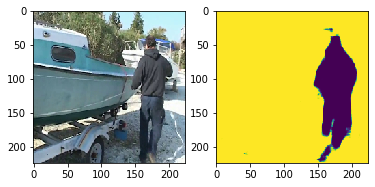

In [39]:
model.eval()

train_dataset = UTPDataset(img_dir='dataset/dataset')

dataiter = iter(val_dataloader)
test = dataiter.next()

image, mask = test['image'], test['mask']
rgb = image[0]
rgb.transpose_(0, 2)

fig = plt.figure()
fig.add_subplot(1,2,1)
plt.imshow(rgb)

image = image.cuda()

output = model(image)

foo = output[1]
foo = foo.cpu()
print(foo[0][0].shape)
fig.add_subplot(1,2,2)
plt.imshow(foo.data.numpy()[0][0])

# Predict single image

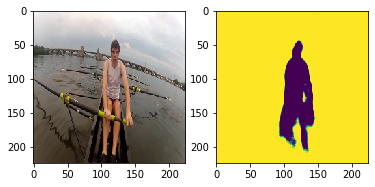

In [96]:
raw_image = Image.open('dataset/dataset/10181_full.png')
fig = plt.figure()
fig.add_subplot(1,2,1)
plt.imshow(raw_image.resize((224, 224)))
raw_image = np.transpose(raw_image.resize((224, 224)), (2,1,0))
imx_t = np.array(raw_image, dtype=np.float32)/255.0

img = torch.FloatTensor(imx_t).cuda()
img = img.view(1, 3, 224, 224)
output = model(img)

foo = output[1]
foo = foo.cpu()
fig.add_subplot(1,2,2)
plt.imshow(foo.data.numpy()[0][0])